# Expected mean, covariance matrix and parametric method method

#### 1) Import relevant libraries

In [38]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#### 2) Input datetime range

In [3]:
# make this dynamic
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2016,12,31)

#### 3) Input tickers in portfolio

In [23]:
portfolio = ['AAPL', 'IBM', 'GOOG', 'BP', 'XOM', 'COST', 'GS']
weights = np.array([0.15, 0.20, 0.20, 0.15, 0.10, 0.15, 0.0])
data = web.DataReader(portfolio,'yahoo',start,end)['Adj Close']
data

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,24.266081,106.805664,758.880005,21.524876,58.759171,142.766663,163.410629
2016-01-04,24.286833,105.509605,741.840027,21.387156,58.389812,141.034027,160.608994
2016-01-05,23.678219,105.432014,742.580017,21.297642,58.887341,141.378769,157.843552
2016-01-06,23.214844,104.904251,743.619995,20.863838,58.397354,140.070480,153.990234
2016-01-07,22.235069,103.111481,726.390015,20.264778,57.462631,136.861542,149.257401
...,...,...,...,...,...,...,...
2016-12-23,27.459557,134.312378,789.909973,27.488420,70.792923,144.924774,221.878250
2016-12-27,27.633949,134.658798,791.549988,27.555244,70.824150,144.897934,222.421478
2016-12-28,27.516117,133.893402,785.049988,27.659191,70.472946,143.967987,221.583618


In [17]:
fig = make_subplots(rows=2, cols=4,
                    subplot_titles=portfolio)

for i in range(1,5):
    fig.add_trace(
    go.Scatter(name = portfolio[i-1], x = data.index, y = data[portfolio[i-1]]),
    row=1, col=i
)

for i in range(1,4):
    fig.add_trace(
    go.Scatter(name = portfolio[i+3] , x = data.index, y = data[portfolio[i+3]]),
    row=2, col=i
)

fig.update_layout(height=600, width=1120, title_text="2016 Daily Adj Close for stocks in portfolio", showlegend = False)
fig.show()

#### 4) Get returns

In [41]:
returns = data.pct_change()[1:]
returns

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-04,0.000855,-0.012135,-0.022454,-0.006398,-0.006286,-0.012136,-0.017145
2016-01-05,-0.025059,-0.000735,0.000998,-0.004185,0.008521,0.002444,-0.017218
2016-01-06,-0.019570,-0.005006,0.001400,-0.020369,-0.008321,-0.009254,-0.024412
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735
2016-01-08,0.005288,-0.009258,-0.016410,-0.017669,-0.020202,-0.017504,-0.004131
...,...,...,...,...,...,...,...
2016-12-23,0.001978,-0.002095,-0.001706,0.002981,-0.001761,0.000062,0.003540
2016-12-27,0.006351,0.002579,0.002076,0.002431,0.000441,-0.000185,0.002448
2016-12-28,-0.004264,-0.005684,-0.008212,0.003772,-0.004959,-0.006418,-0.003767


#### 5) Get covariance matrix

In [42]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Symbols,,,,,,,
AAPL,0.000216,0.000056,0.000087,0.000079,0.000048,0.000051,0.000089
IBM,0.000056,0.000155,0.000054,0.000095,0.000065,0.000025,0.000090
GOOG,0.000087,0.000054,0.000158,0.000049,0.000030,0.000050,0.000067
BP,0.000079,0.000095,0.000049,0.000342,0.000152,0.000027,0.000168
XOM,0.000048,0.000065,0.000030,0.000152,0.000145,0.000022,0.000085
COST,0.000051,0.000025,0.000050,0.000027,0.000022,0.000123,0.000047
GS,0.000089,0.000090,0.000067,0.000168,0.000085,0.000047,0.000286


#### 6) Get expected returns

In [43]:
exp_returns = returns.mean()
exp_returns

Symbols
AAPL    0.000575
IBM     0.000970
GOOG    0.000146
BP      0.001180
XOM     0.000792
COST    0.000072
GS      0.001332
dtype: float64

#### 7) Get portfolio mean and standard deviation using matrix multiplication

In [44]:
count = returns.count()[0]
portfolio_mean = exp_returns @ weights
portfolio_std = np.sqrt(weights.T @ cov_matrix @ weights)

#### 8) Create a histogram

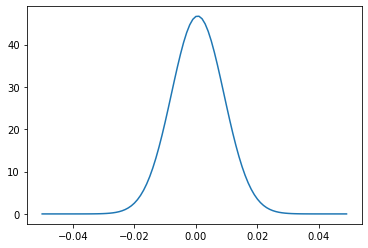

In [45]:
# x axis
x = np.arange(-0.05,0.05,0.001)
norm_dist = norm.pdf(x,portfolio_mean,portfolio_std)

plt.plot(x, norm_dist)

#### 8) Calculate VaR95%

In [46]:
VaR95 = norm.ppf(0.05, portfolio_mean, portfolio_std)
print(f'With 95% confidence, we expect that the worst daily loss for this portfolio will not exceed {round((VaR95*100),4)}%')

With 95% confidence, we expect that the worst daily loss for this portfolio will not exceed -1.3463%


#### 9) Calculate CVaR95%

In [50]:
weightedreturns = pd.DataFrame(returns.index, columns=portfolio)

for i in range(7):
    weightedreturns[portfolio[i]] = returns[portfolio[i]]*weights[i]

weightedreturns["Sum"] = weightedreturns.sum(axis=1)
port_returns = weightedreturns.Sum.iloc[1:]

values = [x for x in port_returns.values if x < VaR95]
CVaR95 = sum(values) / len(values)
print(f'With 95% confidence, the expected loss if the worst-case threshold (above) is ever crossed is {round(CVaR95*100,4)}%')

With 95% confidence, the expected loss if the worst-case threshold (above) is ever crossed is -1.9734%
